# Step 1: Overview

Imports

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Display Settings

In [95]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

Load Data

In [96]:
data_path = "data/data-raw/behavior-data/2019-Oct.csv"
df = pd.read_csv("../../data/data-raw/behavior-data/2019-Oct.csv")


Quick Overview

In [97]:
print("Dataset shape:", df.shape)
print("Head")
display(df.head())
print("Info")
display(df.info())
print("Describe")
display(df.describe(include='all'))

Dataset shape: (42448764, 9)
Head


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42448764 entries, 0 to 42448763
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.8+ GB


None

Describe


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,42448764,42448764,4.244876e+07,4.244876e+07,28933155,36331684,4.244876e+07,4.244876e+07,42448762
unique,2621538,3,NaN,NaN,126,3444,NaN,NaN,9244421
top,2019-10-15 08:52:00 UTC,view,NaN,NaN,electronics.smartphone,samsung,NaN,NaN,fb075266-182d-4c11-b5f7-4e4dcdabd4a7
freq,116,40779399,NaN,NaN,11507231,5282775,NaN,NaN,1159
mean,NaN,NaN,1.054993e+07,2.057404e+18,NaN,NaN,2.903237e+02,5.335371e+08,NaN
std,NaN,NaN,1.188191e+07,1.843926e+16,NaN,NaN,3.582692e+02,1.852374e+07,NaN
min,NaN,NaN,1.000978e+06,2.053014e+18,NaN,NaN,0.000000e+00,3.386938e+07,NaN
25%,NaN,NaN,1.005157e+06,2.053014e+18,NaN,NaN,6.598000e+01,5.159043e+08,NaN
50%,NaN,NaN,5.000470e+06,2.053014e+18,NaN,NaN,1.629300e+02,5.296965e+08,NaN
75%,NaN,NaN,1.600030e+07,2.053014e+18,NaN,NaN,3.585700e+02,5.515788e+08,NaN


Null Values Check

In [98]:
nulls = df.isnull().sum()
print("Null values per column:\n", nulls[nulls > 0])

Null values per column:
 category_code    13515609
brand             6117080
user_session            2
dtype: int64


Unique values for categorical columns

In [99]:
for col in ['event_type', 'category_code', 'brand']:
    print(f"\n{col} - Unique values ({df[col].nunique()}):")
    print(df[col].value_counts(dropna=False).head(10))


event_type - Unique values (3):
event_type
view        40779399
cart          926516
purchase      742849
Name: count, dtype: int64

category_code - Unique values (126):
category_code
NaN                                 13515609
electronics.smartphone              11507231
electronics.clocks                   1311033
computers.notebook                   1137623
electronics.video.tv                 1113750
electronics.audio.headphone          1100188
appliances.kitchen.refrigerators      887755
appliances.kitchen.washer             869404
appliances.environment.vacuum         801670
apparel.shoes                         763901
Name: count, dtype: int64

brand - Unique values (3444):
brand
NaN        6117080
samsung    5282775
apple      4122554
xiaomi     3083763
huawei     1111205
lucente     655861
lg          562404
bosch       557090
oppo        482887
sony        456644
Name: count, dtype: int64


# Step 2: Cleaning

1. Convert Time Columns

* Convert event_time to proper datetime type

* Create additional time features:
  * event_date (YYYY-MM-DD)
  * event_hour or hour_of_day
  * day_of_week
  * month

* These help us analyze time trends, hourly peaks, day-of-week differences in cart/purchase rates, etc.

In [100]:
df['event_time'] = pd.to_datetime(df['event_time'], utc=True)
df['event_date'] = df['event_time'].dt.date
df['event_hour'] = df['event_time'].dt.hour
df['day_of_week'] = df['event_time'].dt.day_name()

2. Clean & Normalize Categorical Columns

* Lowercase and trim brand, category_code
* Fill or flag missing brand and category_code with a placeholder
* extract top-level category from category_code

Strip and lowercase brand & category_code

In [101]:
df['brand'] = df['brand'].str.strip().str.lower()
df['category_code'] = df['category_code'].str.strip().str.lower()

Fill missing values with a placeholders "unknown_brand" and "unknown_category"

In [102]:
df = df.fillna({'brand': 'unknown_brand', 'category_code': 'unknown_category'})

Extract high-level main category and call it "main_category"

In [103]:
df['main_category'] = df['category_code'].apply(lambda x: x.split('.')[0] if '.' in x else x)

Sanity check after cleaning

In [104]:
print("Top 10 cleaned brands:")
print(df['brand'].value_counts().head(10))


print("\nTop 10 main categories:")
print(df['main_category'].value_counts().head(10))

Top 10 cleaned brands:
brand
unknown_brand    6117080
samsung          5282775
apple            4122554
xiaomi           3083763
huawei           1111205
lucente           655861
lg                562404
bosch             557090
oppo              482887
sony              456644
Name: count, dtype: int64

Top 10 main categories:
main_category
electronics         16135623
unknown_category    13515609
appliances           4967294
computers            2324217
apparel              1542924
furniture            1247160
auto                 1013115
construction          730834
kids                  520619
accessories           238238
Name: count, dtype: int64


# Step 3: Sanity Checks, Filtering, and Feature Engineering

* Drop rows with extreme or nonsensical prices (e.g. price <= 0)
* Filter to know categories or brands
* Convert event_time to datetime and extract
    * event_date
    * event_hour
    * event_dayofweek
    * month, week, etc.
* Preview time-based patterns and user behavior

Remove rows with price <= 0 or missing

In [105]:
initial_len = len(df)
df = df[df['price'] > 0].copy()
print(f"Removed {initial_len - len(df):,} rows with non-positive prices.")

Removed 68,673 rows with non-positive prices.


Convert event_time to datetime

In [106]:
df['event_time'] = pd.to_datetime(df['event_time'], utc=True)

Extract useful datetime features

In [107]:
df['event_date'] = df['event_time'].dt.date
df['event_hour'] = df['event_time'].dt.hour
df['event_dayofweek'] = df['event_time'].dt.dayofweek  # Monday = 0
df['event_month'] = df['event_time'].dt.month
df['event_day'] = df['event_time'].dt.day

Check time range and shape again

In [108]:
print(f"\n📆 Time Range: {df['event_time'].min()} to {df['event_time'].max()}")
print(f"📊 Shape after filtering: {df.shape}")


📆 Time Range: 2019-10-01 00:00:00+00:00 to 2019-10-31 23:59:59+00:00
📊 Shape after filtering: (42380091, 16)


Preview some distributions

In [109]:
print("\n🕒 Top event hours:")
print(df['event_hour'].value_counts().sort_index())

print("\n📅 Top event days of week (0=Monday):")
print(df['event_dayofweek'].value_counts().sort_index())


🕒 Top event hours:
event_hour
0      306310
1      558107
2     1067502
3     1548191
4     1913098
5     2122460
6     2265539
7     2331952
8     2386023
9     2348084
10    2293176
11    2190364
12    2134230
13    2350745
14    2674335
15    2976042
16    3049877
17    2729099
18    2121380
19    1338793
20     742953
21     437650
22     272502
23     221679
Name: count, dtype: int64

📅 Top event days of week (0=Monday):
event_dayofweek
0    5312365
1    6786541
2    6639353
3    6370365
4    5818540
5    5600315
6    5852612
Name: count, dtype: int64


# Step 4: Exploratory Data Analysis (EDA)

* Explore most viewed/purchased categories and brands
* Visualize the conversion funnel (view → cart → purchase)
* Analyze purchase behavior across:
    * Days of the week
    * Hours of the day
* Inspect price distribution of purchases
* Find categories with:
    * Highest average purchase prices
    * Highest total revenue


Popular categories and brands

In [110]:
print("🔹 Top 10 Most Viewed Categories:")
print(df[df['event_type'] == 'view']['main_category'].value_counts().head(10))

print("\n🔹 Top 10 Most Purchased Brands:")
print(df[df['event_type'] == 'purchase']['brand'].value_counts().head(10))

🔹 Top 10 Most Viewed Categories:
main_category
electronics         15027719
unknown_category    13199458
appliances           4796007
computers            2266053
apparel              1529368
furniture            1231445
auto                  992761
construction          711922
kids                  511687
accessories           235283
Name: count, dtype: int64

🔹 Top 10 Most Purchased Brands:
brand
samsung          172896
apple            142873
unknown_brand     58305
xiaomi            56616
huawei            23501
lucente           11578
oppo              10891
cordiant          10551
lg                 8727
acer               6882
Name: count, dtype: int64


Conversion Funnel

In [111]:
funnel = df['event_type'].value_counts(normalize=True).rename_axis('event').reset_index(name='percent')
funnel['percent'] = funnel['percent'] * 100
print("\n🔹 Conversion Funnel (Percentages):")
print(funnel)


🔹 Conversion Funnel (Percentages):
      event    percent
0      view  96.061323
1      cart   2.185852
2  purchase   1.752825


Conversion Funnel Bar Plot

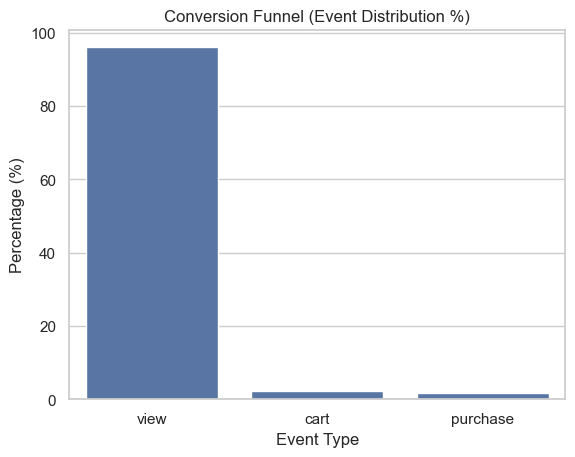

In [112]:
sns.barplot(x='event', y='percent', data=funnel)
plt.title('Conversion Funnel (Event Distribution %)')
plt.ylabel('Percentage (%)')
plt.xlabel('Event Type')
plt.show()

Purchases by Day of Week

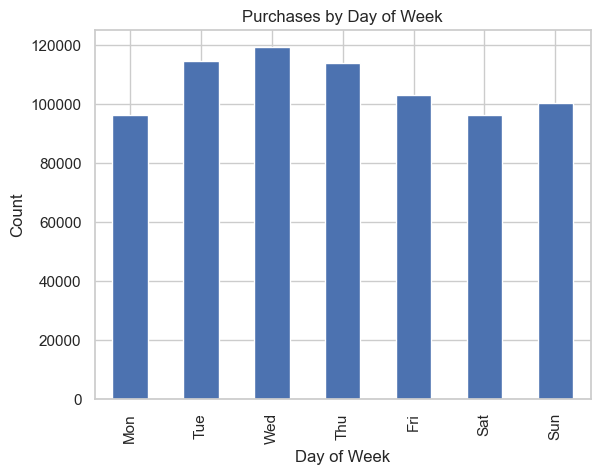

In [113]:
purchase_by_day = df[df['event_type'] == 'purchase']['event_dayofweek'].value_counts().sort_index()
purchase_by_day.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
purchase_by_day.plot(kind='bar')
plt.title("Purchases by Day of Week")
plt.ylabel("Count")
plt.xlabel("Day of Week")
plt.show()

Hourly purchase activity

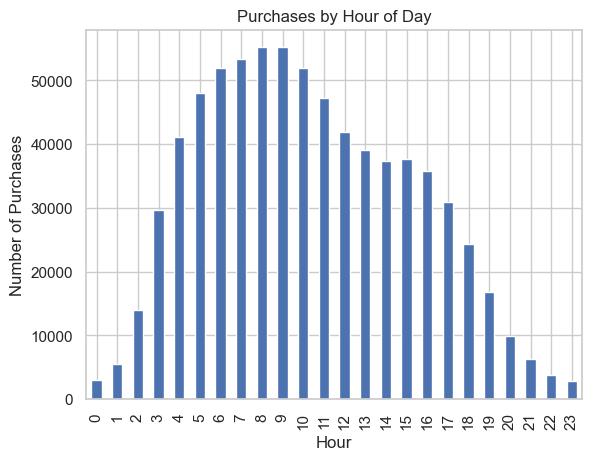

In [114]:
purchase_by_hour = df[df['event_type'] == 'purchase']['event_hour'].value_counts().sort_index()
purchase_by_hour.plot(kind='bar')
plt.title("Purchases by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Purchases")
plt.show()

Price distribution of purchases

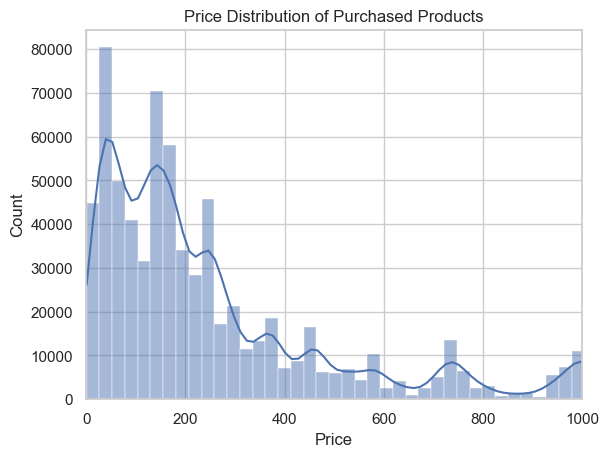

In [115]:
purchase_prices = df[df['event_type'] == 'purchase']['price']
sns.histplot(purchase_prices, bins=100, kde=True)
plt.title("Price Distribution of Purchased Products")
plt.xlabel("Price")
plt.xlim(0, 1000)  # You can change this based on the spread
plt.show()

Average purchase price by main_category


🔹 Avg Purchase Price by Category:
main_category
electronics         417.145362
computers           408.503847
sport               260.970065
country_yard        217.992361
furniture           201.629802
appliances          181.117952
unknown_category    132.189345
kids                123.703150
auto                119.965315
construction        119.599413
Name: price, dtype: float64


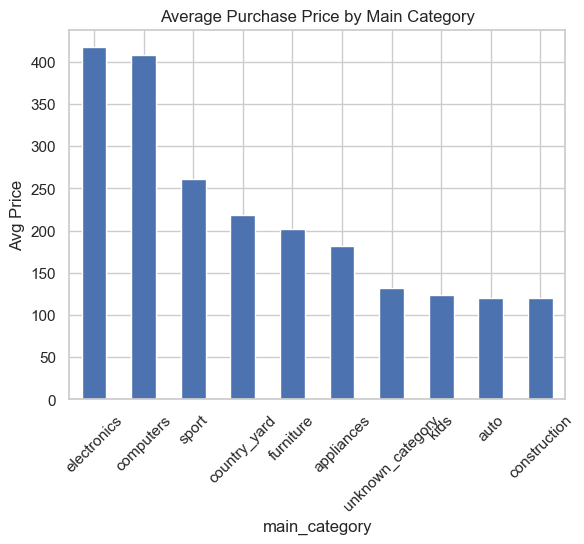

In [116]:
avg_price_by_cat = df[df['event_type'] == 'purchase'].groupby('main_category')['price'].mean().sort_values(ascending=False)
print("\n🔹 Avg Purchase Price by Category:")
print(avg_price_by_cat.head(10))
avg_price_by_cat.head(10).plot(kind='bar')
plt.title("Average Purchase Price by Main Category")
plt.ylabel("Avg Price")
plt.xticks(rotation=45)
plt.show()

Top revenue-generating categories


🔹 Total Revenue by Category:
main_category
electronics         1.764642e+08
unknown_category    2.292494e+07
appliances          1.358312e+07
computers           1.137887e+07
furniture           1.673729e+06
auto                1.274032e+06
construction        9.329950e+05
kids                6.781407e+05
apparel             6.249378e+05
sport               3.225590e+05
Name: price, dtype: float64


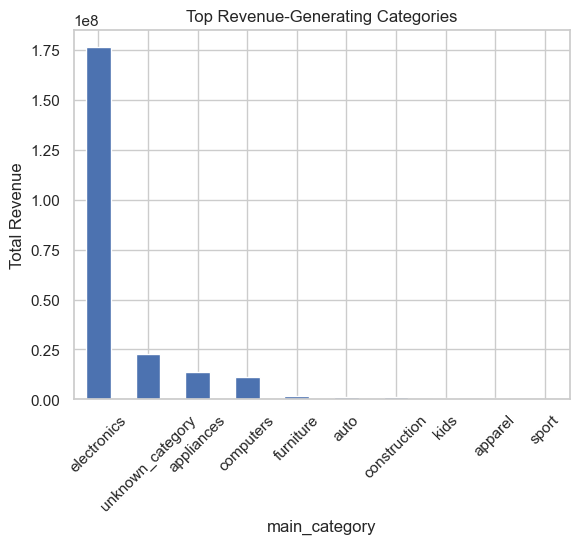

In [117]:
revenue_by_category = df[df['event_type'] == 'purchase'].groupby('main_category')['price'].sum().sort_values(ascending=False)
print("\n🔹 Total Revenue by Category:")
print(revenue_by_category.head(10))
revenue_by_category.head(10).plot(kind='bar')
plt.title("Top Revenue-Generating Categories")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# Step 5: User Behavior Analysis

In this step, we analyze user-level behavior to identify key user patterns and segments.

### Key Objectives:
- Analyze sessions and actions per user
- Determine conversion rate per user
- Identify top spenders and repeat users
- Segment users by behavior (viewers vs buyers)

### We will explore:
- How many unique sessions does each user have?
- How many users convert (make purchases)?
- What is the average order value per user?
- How many users are high-value (e.g., > 500€ spent)?
- Distribution of actions per session

This step is important to understand user journeys and identify how to optimize conversion funnels.

Precompute purchase-only price stats

In [118]:
purchase_df = df[df['event_type'] == 'purchase']
purchase_agg = purchase_df.groupby('user_id')['price'].agg(
    total_spent='sum',
    avg_spent_per_purchase='mean'
).reset_index()

Base user stats (no .loc in lambda)

In [119]:
user_stats = df.groupby('user_id').agg(
    sessions=('user_session', 'nunique'),
    total_events=('event_type', 'count'),
    views=('event_type', lambda x: (x == 'view').sum()),
    carts=('event_type', lambda x: (x == 'cart').sum()),
    purchases=('event_type', lambda x: (x == 'purchase').sum())
).reset_index()

Merge purchase stats

In [120]:
user_stats = user_stats.merge(purchase_agg, on='user_id', how='left')

Fill missing purchase stats for non-buyers

In [121]:
user_stats['total_spent'] = user_stats['total_spent'].fillna(0)
user_stats['avg_spent_per_purchase'] = user_stats['avg_spent_per_purchase'].fillna(0)

Add buyer flag

In [122]:
user_stats['is_buyer'] = user_stats['purchases'] > 0


Conversion Rate

In [123]:
conversion_rate = user_stats['is_buyer'].mean() * 100
print(f"🧮 User-Level Conversion Rate: {conversion_rate:.2f}%")

🧮 User-Level Conversion Rate: 11.49%


Top Spenders

In [124]:
print("\n💰 Top 10 Users by Total Spend:")
print(user_stats.sort_values(by='total_spent', ascending=False).head(10))


💰 Top 10 Users by Total Spend:
           user_id  sessions  total_events  views  carts  purchases  \
693713   519267944       157           682    315    184        183   
135540   513117637       115           707    466     56        185   
382586   515384420        76           482    234    126        122   
1086530  530834332        80           711    489     52        170   
25101    512386086       181          1119    630    167        322   
691554   519250600        65           464    266     77        121   
219262   513784794        50           351    221      4        126   
1291990  538216048        80           476    289     61        126   
273316   514320330       109           455    288     81         86   
1879044  553431815        37           309    175     10        124   

         total_spent  avg_spent_per_purchase  is_buyer  
693713     265569.52             1451.199563      True  
135540     244500.00             1321.621622      True  
382586     2107

High-value Users

In [125]:
high_value_users = user_stats[user_stats['total_spent'] > 500]
print(f"\n💎 Users who spent more than €500: {len(high_value_users)}")


💎 Users who spent more than €500: 101457


Buyers vs Non-Buyers

In [126]:
print("\n📊 User Type Distribution:")
print(user_stats['is_buyer'].value_counts())



📊 User Type Distribution:
is_buyer
False    2674317
True      347118
Name: count, dtype: int64


High-value user count

In [127]:
high_value_users = user_stats[user_stats['total_spent'] > 500]
print(f"\n💎 Users who spent more than €500: {len(high_value_users)}")


💎 Users who spent more than €500: 101457


Distribution of user types

In [128]:
user_type_counts = user_stats['is_buyer'].value_counts()
print("\n📊 User Type Distribution (Buyers vs Non-buyers):")
print(user_type_counts)


📊 User Type Distribution (Buyers vs Non-buyers):
is_buyer
False    2674317
True      347118
Name: count, dtype: int64


Plot: Distribution of Sessions per User

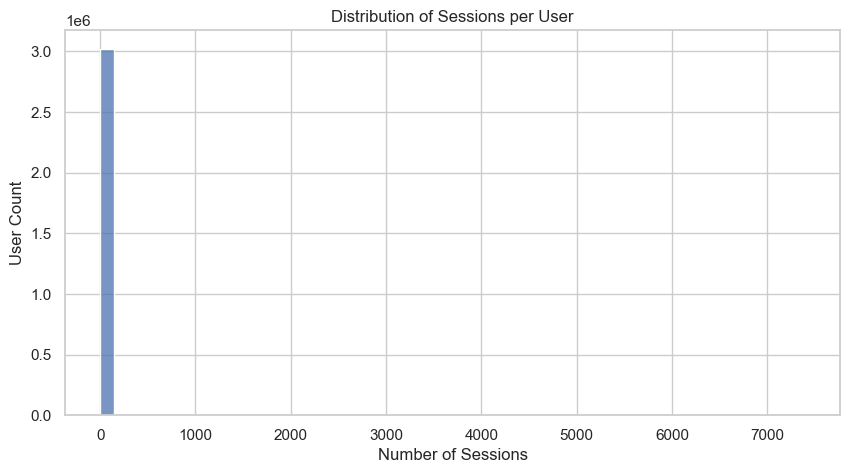

In [129]:
plt.figure(figsize=(10,5))
sns.histplot(user_stats['sessions'], bins=50, kde=False)
plt.title("Distribution of Sessions per User")
plt.xlabel("Number of Sessions")
plt.ylabel("User Count")
plt.show()

Plot: Purchases vs Sessions

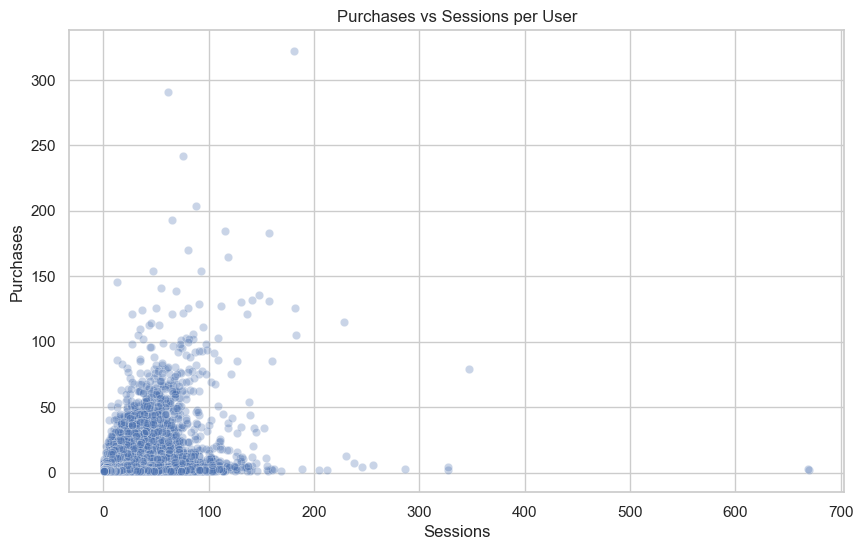

In [130]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=user_stats[user_stats['purchases'] > 0], x='sessions', y='purchases', alpha=0.3)
plt.title("Purchases vs Sessions per User")
plt.xlabel("Sessions")
plt.ylabel("Purchases")
plt.show()

Save The Cleaned Behavior Data

In [134]:
#data_path = "data/data-raw/behavior-data/2019-Oct.csv"
#df = pd.read_csv("../../data/data-raw/behavior-data/2019-Oct.csv")

df.to_csv('../../data/data-cleaned/behavior-data/2019-Oct-cleaned.csv', index=False)

In [135]:
df.dtypes

event_time         datetime64[ns, UTC]
event_type                      object
product_id                       int64
category_id                      int64
category_code                   object
brand                           object
price                          float64
user_id                          int64
user_session                    object
event_date                      object
event_hour                       int32
day_of_week                     object
main_category                   object
event_dayofweek                  int32
event_month                      int32
event_day                        int32
dtype: object